In [1]:
#Importing Python Modules Pandas, Numpy, Seaborn and MetaplotLib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading Medical Insurance dataset into variable df by using pandas
df = pd.read_csv("F:\Data Science Course\Joyita\Medical Insurance - R\insurance.csv")

In [3]:
#To view first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
def region(x):
    if(x == "southwest"):
        return "0"
    elif(x == "southeast"):
        return "1"
    elif(x == "northwest"):
        return "2"
    elif(x == "northeast"):
        return "3"

In [7]:
df["region"] = df["region"].apply(lambda x : region(x))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,2,10600.54830
1334,18,female,31.920,0,no,3,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,0,2007.94500


In [8]:
def sex(y):
    if(y == "female"):
        return "0"
    elif(y == "male"):
        return "1"

In [9]:
df["sex"] = df["sex"].apply(lambda y : sex(y))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,0,16884.92400
1,18,1,33.770,1,no,1,1725.55230
2,28,1,33.000,3,no,1,4449.46200
3,33,1,22.705,0,no,2,21984.47061
4,32,1,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,2,10600.54830
1334,18,0,31.920,0,no,3,2205.98080
1335,18,0,36.850,0,no,1,1629.83350
1336,21,0,25.800,0,no,0,2007.94500


In [10]:
def smoker(z):
    if(z == "yes"):
        return "0"
    elif(z == "no"):
        return "1"

In [11]:
df["smoker"] = df["smoker"].apply(lambda z : smoker(z))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [12]:
#To add the new columns to the parent Data Set in the CSV File
df.to_csv("F:/Data Science Course/Joyita/Medical Insurance - R/test_ins.csv")

In [13]:
df = pd.read_csv("F:/Data Science Course/Joyita/Medical Insurance - R/test_ins.csv")
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,0,0,16884.92400
1,1,18,1,33.770,1,1,1,1725.55230
2,2,28,1,33.000,3,1,1,4449.46200
3,3,33,1,22.705,0,1,2,21984.47061
4,4,32,1,28.880,0,1,2,3866.85520


In [14]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Calculating VIF 
Ideally VIF should be less than or equal to 5

In [15]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,7.918619
1,sex,1.992986
2,bmi,10.873281
3,children,1.802768
4,smoker,4.431902
5,region,2.558106


In [17]:
#spliting independent features and target label
X = df.iloc[:,:-1]  #independent features
Y = df["charges"]  #dependent feature or target 

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [19]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
#SKLearn for train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
X = ["age", "sex", "bmi", "children", "smoker", "region"]

In [24]:
#Calculating Coefficient Factor
#Ideally Coefficient should be less than or equal to +/- 2

coeff_df = pd.DataFrame(regressor.coef_, X, columns=['Coefficient'])  
coeff_df

,Coefficient
age,11683.625212
sex,-24.324551
bmi,12206.725274
children,2218.646477
smoker,-23568.879484
region,865.525718


In [25]:
Y_pred = regressor.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)

In [27]:
df1.head()

,Actual,Predicted
578,9724.53000,11791.791508
610,8547.69130,10484.212862
569,45702.02235,39741.884041
1034,12950.07120,17664.863267
198,9644.25250,6565.294032


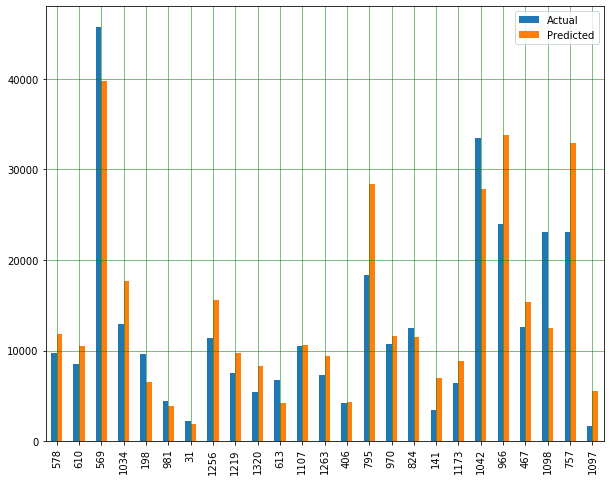

In [28]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
from sklearn.metrics import *
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('R square:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 4270.332486508739
Mean Squared Error: 32325887.125475187
Root Mean Squared Error: 5685.585908723497
R square: 0.7968585761364153


In [ ]:
#5685.5859
#5975.1721 bmi
#11780.4095 bmi smoker
#11488.0989 smoker
#5705.9462 region
#6828.8578 age
#5976.01344 bmi region

KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()  
regressor.fit(X_train, Y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [31]:
X = ["age", "sex", "bmi", "children", "smoker", "region"]

In [32]:
Y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)

In [34]:
df1.head()

,Actual,Predicted
578,9724.53000,9071.269400
610,8547.69130,8242.239640
569,45702.02235,48343.460554
1034,12950.07120,11324.034480
198,9644.25250,11324.459740


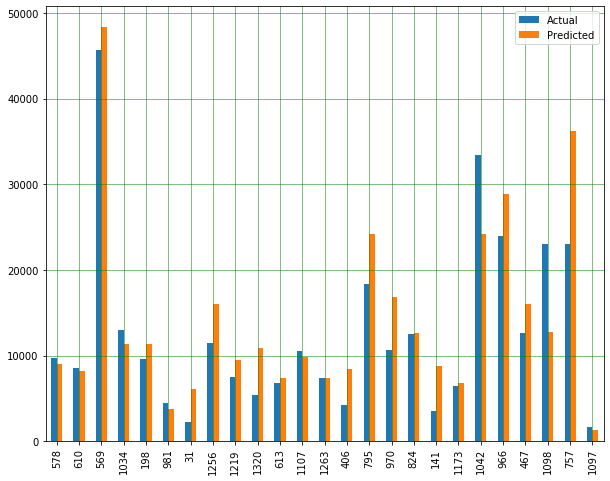

In [35]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
from sklearn.metrics import *
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3279.013569847015
Mean Squared Error: 26107502.005604025
Root Mean Squared Error: 5109.550078588527


Decision Tree Algorithm

In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
X = ["age", "sex", "bmi", "children", "smoker", "region"]

In [39]:
Y_pred = regressor.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)

In [41]:
df1.head()

,Actual,Predicted
578,9724.53000,27346.04207
610,8547.69130,8569.86180
569,45702.02235,63770.42801
1034,12950.07120,13143.86485
198,9644.25250,9566.99090


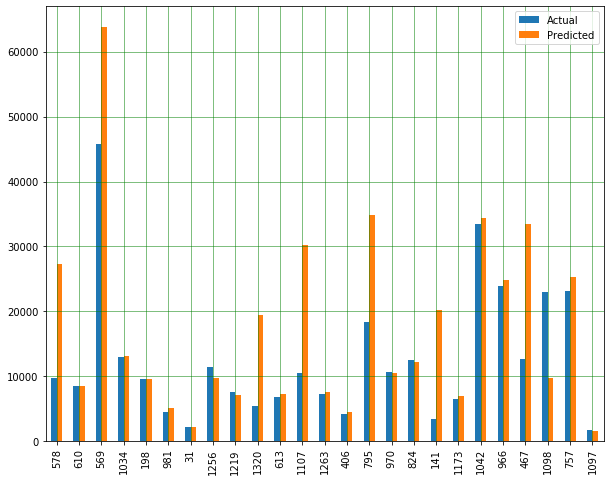

In [42]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
from sklearn.metrics import *
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3995.172576414179
Mean Squared Error: 58418560.599314116
Root Mean Squared Error: 7643.20355605646
